<a href="https://colab.research.google.com/github/Sarinezs/Machine-Learning/blob/main/License_Plate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics easyocr roboflow
!pip install -q streamlit
!npm install -g localtunnel
!npm audit fix --force
from google.colab import drive
drive.mount('/content/drive')

import easyocr
import cv2
import matplotlib.pyplot as plt
from roboflow import Roboflow
from PIL import Image, ImageFont, ImageDraw
import numpy as np
from ultralytics import YOLO


rf = Roboflow(api_key="Jru6dEwbPFxvN1sf5wVF")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.0 MB/s et


Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:10<00:00, 4623.95it/s]


In [ ]:

model = YOLO('yolov8n.pt')

path = '/content/License-Plate-Recognition-4/data.yaml'
results = model.train(data=path,
                      epochs=50,
                      imgsz=640,
                      batch=32,
                      patience=3,
                      optimizer='Adam',
                      lr0=0.001,
                      # project='/content/drive/MyDrive/ML/Machine_Learning_Project',
                      # name='trained_model'
                      )



Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=50, time=None, patience=3, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/License-Plate-Recognition-4/train/labels.cache... 21173 images, 28 backgrounds, 0 corrupt: 100%|██████████| 21173/21173 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/License-Plate-Recognition-4/valid/labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.543      3.811      1.601         46        640:   0%|          | 2/662 [02:07<11:43:12, 63.93s/it]


KeyboardInterrupt: 

In [ ]:

model = YOLO('yolov8n.pt')
path = '/content/License-Plate-Recognition-4/data.yaml'

model.tune(data=path,
           epochs=3,
           patience=5,
           optimizer='Adam',
           lr0=0.0001,
           batch=32,
           iterations=3,
           project='/content/drive/MyDrive/ML/Machine_Learning_Project',
           name='tuned_param')




Tuner: Initialized Tuner instance with 'tune_dir=/content/drive/MyDrive/ML/Machine_Learning_Project/tune2'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/3 with hyperparameters: {'lr0': 0.0001, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved /content/drive/MyDrive/ML/Machine_Learning_Project/tune2/tune_scatter_plots.png
Saved /content/drive/MyDrive/ML/Machine_Learning_Project/tune2/tune_fitness.png

Tuner: 1/3 iterations complete ✅ (1320.79s)
Tuner: Results saved to /content/drive/MyDrive/ML/Machine_Learning_Project/tune2
Tuner: Best fitness=0.69985 observed at iteration 1
Tuner: Best fitness metrics are {'metr

In [ ]:
load_model = YOLO('/content/drive/MyDrive/ML/Machine_Learning_Project/trained_model/weights/best.pt')



WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/License-Plate-Recognition-4/test/images/CarLongPlateGen2577_jpg.rf.e24e0e4356f004720e8a339b75d66b94.jpg: 640x640 1 License_Plate, 816.7ms
Speed: 16.9ms preprocess, 816.7ms inference, 14.4ms postprocess per image at shape (1, 3, 640, 640)


ff i6l59 0.03637184438489969


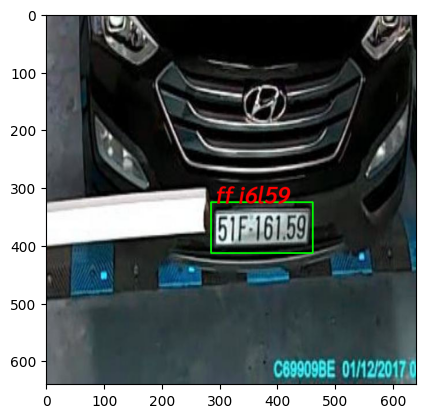

In [ ]:
img_path='/content/License-Plate-Recognition-4/test/images/CarLongPlateGen2577_jpg.rf.e24e0e4356f004720e8a339b75d66b94.jpg'

result = load_model.predict(source=img_path,
                            # save=True,
                            imgsz=640,
                            conf=0.5,
                            show_labels=True,
                            show_conf=True,
                            show=True,
                            # save_crop=True,
                            )

reader = easyocr.Reader(['th','en']) # English reader
licenseplate_coor = result[0].boxes.xyxy.cpu().numpy()

if len(licenseplate_coor) == 0:
  print('No license plate detected')
else:
  img=cv2.imread(img_path)

  for i in range (len(licenseplate_coor)):
    lp = licenseplate_coor[i]

    #ตำแหน่งทะเบียน
    start_x = int(lp[0])
    start_y = int(lp[1])
    end_x = int(lp[2])
    end_y = int(lp[3])

    license_plate = img[start_y:end_y, start_x:end_x, :].copy()

    cv2.rectangle(img, (start_x,start_y), (end_x,end_y), (0, 255, 0),2)

    image_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    font_path = '/content/drive/MyDrive/ML/Machine_Learning_Project/Font/Sarabun-SemiBoldItalic.ttf'
    font = ImageFont.truetype(font_path, 40)

    draw = ImageDraw.Draw(image_pil)

    text_array = ''
    lp_text = reader.readtext(license_plate)
    for i in lp_text:
      bbox, text, score = i
      text_array = text_array + ' ' + text
      print(text,score)

    draw.text((start_x, start_y - 40), text_array, font=font, fill=(0, 0, 255))
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(np.array(image_pil), cv2.COLOR_BGR2RGB))

In [ ]:
path = '/content/License-Plate-Recognition-4/data.yaml'
metrics = load_model.val(data=path, imgsz=640, project='/content/drive/MyDrive/ML/Machine_Learning_Project', name='mAP')

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/License-Plate-Recognition-4/valid/labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:22<00:00,  5.57it/s]


                   all       2046       2132      0.967      0.939      0.974      0.666
Speed: 0.7ms preprocess, 3.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/drive/MyDrive/ML/Machine_Learning_Project/mAP


In [ ]:
print("Mean Average Precision (mAP) IoU(0.50-0.95) = ",round(metrics.box.map,2))
print("Mean Average Precision (mAP) IoU(0.50)      = ",round(metrics.box.map50,2))
print("Mean Average Precision (mAP)IoU(0.75)       = ",round(metrics.box.map75,2))

Mean Average Precision (mAP) IoU(0.50-0.95) =  0.67
Mean Average Precision (mAP) IoU(0.50)      =  0.97
Mean Average Precision (mAP)IoU(0.75)       =  0.78


In [ ]:
%%writefile app.py

import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from roboflow import Roboflow
from PIL import Image, ImageFont, ImageDraw
from ultralytics import YOLO
import streamlit as st

st.set_page_config(page_title="License Plate Analysis App")

st.title("License Plate Analysis App")

Conf_threshold = st.sidebar.slider('confidence threshold',
                                   min_value=0.1,
                                   max_value=1.0,
                                   value=0.5,
                                   step=0.01)

load_model = YOLO('/content/drive/MyDrive/ML/Machine_Learning_Project/trained_model/weights/best.pt')

reader = easyocr.Reader(['th','en'])

uploaded_file = st.file_uploader("Choose an image...", type="jpg")


if uploaded_file is not None:

  file_bytes = np.frombuffer(uploaded_file.read(), np.uint8)

  img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

  result = load_model.predict(source=img,
                              imgsz=640,
                              conf=Conf_threshold,
                              )

  licenseplate_coor = result[0].boxes.xyxy.cpu().numpy()

  if len(licenseplate_coor) == 0:
    st.subheader("No license plate detected")
  else:
    text_array = []

    for i in range (len(licenseplate_coor)):
      lp = licenseplate_coor[i]

      #ตำแหน่งทะเบียน
      start_x = int(lp[0])
      start_y = int(lp[1])
      end_x = int(lp[2])
      end_y = int(lp[3])

      license_plate = img[start_y:end_y, start_x:end_x, :].copy()

      cv2.rectangle(img, (start_x,start_y), (end_x,end_y), (0, 0, 255),2)

      texts = ''
      lp_text = reader.readtext(license_plate)
      for i in lp_text:
        bbox, text, score = i
        texts = texts + ' ' + text

      text_array.append(texts)

    plot_img = result[0].plot()

    plot_img_rgb = cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB)

    plot_img_pil = Image.fromarray(plot_img_rgb)

    st.image(plot_img_pil, caption="YOLO Prediction", use_container_width=True)
    for text in text_array:
      st.subheader(text)


Writing app.py


In [ ]:
!streamlit run /content/app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.126.170.217:8501

your url is: https://moody-rings-invite.loca.lt
2024-11-08 02:12:48.106 Uncaught exception GET /_stcore/stream (127.0.0.1)
HTTPServerRequest(protocol='http', host='moody-rings-invite.loca.lt', method='GET', uri='/_stcore/stream', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tornado/websocket.py", line 937, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/server/browser_websocket_handler.py", line 126, in open
    self._session_id = self._runtime.connect_session(
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/runtime.py", line 384, in connect_session
    session_id = self._session_mgr.connect_session(
  File